<a href="https://colab.research.google.com/github/mrant23/TugasUAS_MachineLearning/blob/main/Tugas_UAS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 ***KELOMPOK ENIGMA***

1.   ANTONIUS AFRIALDI SERAN
2.   ANGGRAINI
3.   YUNITHA PUTRI HANDAYANI

**CASE** :Prediksi Keselamatan Penumpang Titatanic dengan Algoritma K-Nearest Neighbors (KNN)




In [2]:
#import Library
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline

In [3]:
# Membaca file CSV
df = pd.read_csv('/content/drive/MyDrive/ANTONIUS_TM9/dataset_titanic/titanic.csv', delimiter=';')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,Braund Mr. Owen Harris,male,22.0,1,0,A/5 21171,7.25,NaN,S
1,2,1,1,Cumings Mrs. John Bradley (Florence Briggs Tha...,female,38.0,1,0,PC 17599,712.833,C85,C
2,3,1,3,Heikkinen Miss. Laina,female,26.0,0,0,STON/O2. 3101282,7.925,NaN,S
3,4,1,1,Futrelle Mrs. Jacques Heath (Lily May Peel),female,35.0,1,0,113803,53.1,C123,S
4,5,0,3,Allen Mr. William Henry,male,35.0,0,0,373450,8.05,NaN,S


In [4]:
# Eksplorasi data
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1079 entries, 0 to 1078
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1079 non-null   int64  
 1   Survived     1079 non-null   int64  
 2   Pclass       1079 non-null   int64  
 3   Name         1079 non-null   object 
 4   Sex          1079 non-null   object 
 5   Age          865 non-null    float64
 6   SibSp        1079 non-null   int64  
 7   Parch        1079 non-null   int64  
 8   Ticket       1079 non-null   object 
 9   Fare         1078 non-null   object 
 10  Cabin        247 non-null    object 
 11  Embarked     1077 non-null   object 
dtypes: float64(1), int64(5), object(6)
memory usage: 101.3+ KB
None


In [5]:
# Eksplorasi data
print(df.describe())

       PassengerId     Survived       Pclass         Age        SibSp  \
count  1079.000000  1079.000000  1079.000000  865.000000  1079.000000   
mean    540.000000     0.381835     2.303985   29.848173     0.506951   
std     311.624774     0.486062     0.840914   14.332953     1.055816   
min       1.000000     0.000000     1.000000    0.420000     0.000000   
25%     270.500000     0.000000     2.000000   21.000000     0.000000   
50%     540.000000     0.000000     3.000000   28.000000     0.000000   
75%     809.500000     1.000000     3.000000   38.000000     1.000000   
max    1079.000000     1.000000     3.000000   80.000000     8.000000   

             Parch  
count  1079.000000  
mean      0.383689  
std       0.829172  
min       0.000000  
25%       0.000000  
50%       0.000000  
75%       0.000000  
max       6.000000  


# **KORELASI DATA**

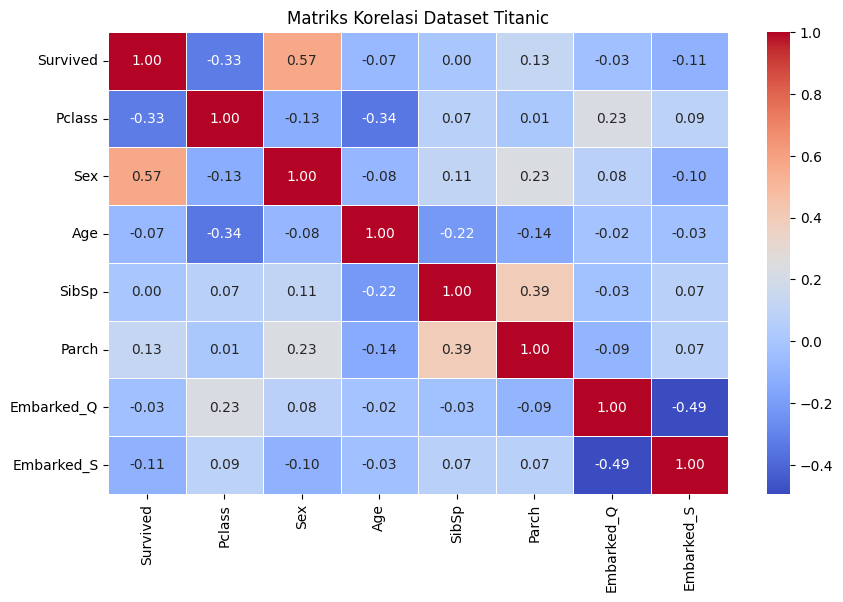

In [6]:
#Preprocessing untuk korelasi
data_corr = df.copy()
data_corr = data_corr.drop(['PassengerId', 'Name', 'Ticket', 'Cabin', 'Fare'], axis=1)
data_corr['Sex'] = data_corr['Sex'].map({'male': 0, 'female': 1})
data_corr = pd.get_dummies(data_corr, columns=['Embarked'], drop_first=True)
data_corr['Age'] = data_corr['Age'].fillna(data_corr['Age'].mean())

# Menghitung matriks korelasi
correlation_matrix = data_corr.corr()

# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Matriks Korelasi Dataset Titanic')
plt.show()

# **MENENTUKAN NILAI K**

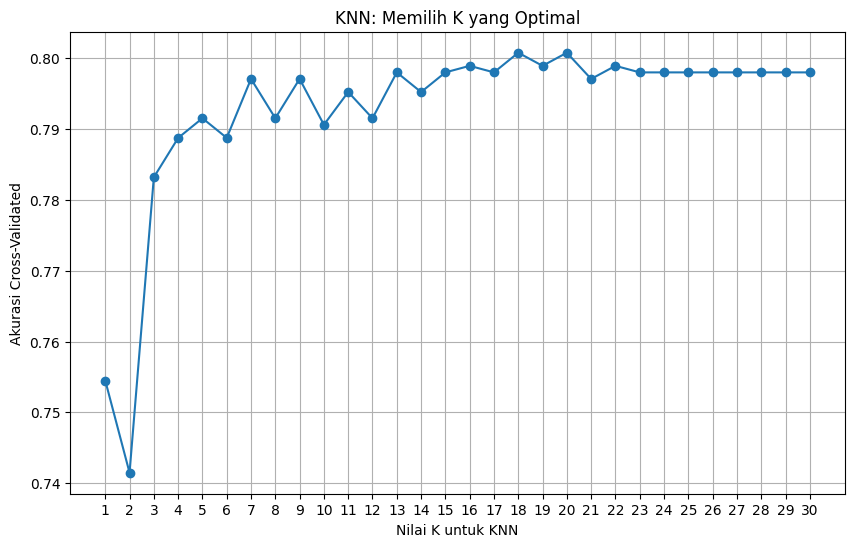

Nilai K yang optimal adalah 18


In [7]:
# Preprocessing untuk penentuan K
data_k = df.copy()
data_k = data_k.drop(['PassengerId', 'Name', 'Ticket', 'Cabin', 'Fare', 'Pclass', 'Embarked', 'Age', 'SibSp'], axis=1)
data_k['Sex'] = data_k['Sex'].map({'male': 0, 'female': 1})

# Memisahkan fitur dan target
X_k = data_k[['Sex', 'Parch']]
y_k = data_k['Survived']

# Setup pipeline untuk imputasi dan scaling
pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),  # Mengisi nilai yang hilang
    ('scaler', StandardScaler())  # Standarisasi fitur
])

# Menerapkan pipeline ke fitur
X_k = pipeline.fit_transform(X_k)

# Menentukan K optimal menggunakan cross-validation
k_range = range(1, 31)
k_scores = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_k, y_k, cv=10, scoring='accuracy')
    k_scores.append(scores.mean())

# Plot hasil cross-validation
plt.figure(figsize=(10, 6))
plt.plot(k_range, k_scores, marker='o')
plt.title('KNN: Memilih K yang Optimal')
plt.xlabel('Nilai K untuk KNN')
plt.ylabel('Akurasi Cross-Validated')
plt.xticks(k_range)
plt.grid()
plt.show()

# Menemukan nilai K terbaik
best_k = k_range[np.argmax(k_scores)]
print(f'Nilai K yang optimal adalah {best_k}')

# **Algoritma K-Nearest Neighbors (KNN)**

In [8]:
# Mengubah kolom 'Sex' menjadi numerik untuk algoritma utama
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})


In [9]:
# Memisahkan fitur dan target
X = df[['Sex', 'Parch']]
y = df['Survived']


In [10]:
# Memisahkan data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
# Membuat model KNN dengan K optimal
knn = KNeighborsClassifier(n_neighbors=18)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=18)

In [13]:
# Melakukan prediksi terhadap data uji
y_pred = knn.predict(X_test)

# Prediksi dan evaluasi model
print(classification_report(y_test, y_pred))
print('Akurasi:', accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.86      0.85       127
           1       0.79      0.78      0.78        89

    accuracy                           0.82       216
   macro avg       0.82      0.82      0.82       216
weighted avg       0.82      0.82      0.82       216

Akurasi: 0.8240740740740741
